#Cleaned students perfomance

In [1]:
# Import the desk
from google.colab import files
import pandas as pd # Import the pandas library and assign it the alias 'pd'

uploaded = files.upload()  # Sube el archivo CSV desde tu computadora

# Cargar el archivo en un DataFrame
df = pd.read_csv(next(iter(uploaded)))
df.head()
info = df.info()
print(info)

Saving Cleaned_Students_Performance_1.csv to Cleaned_Students_Performance_1.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.2+ KB
None


In [2]:
# Librerías necesarias
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Identificar columnas numéricas y categóricas
data = df

numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# 2. Crear transformaciones
# Pipeline para datos numéricos: imputación + escalado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación con la media
    ('scaler', StandardScaler())  # Escalado estándar
])

# Pipeline para datos categóricos: imputación + codificación
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación One-Hot
])

# Combinar pipelines en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Aplicar preprocesamiento al dataset
preprocessed_data = preprocessor.fit_transform(data)

# Convertir los datos preprocesados a un DataFrame
processed_data = pd.DataFrame(preprocessed_data)

# Verificar los resultados
print("Datos Preprocesados:")
print(processed_data.head())


Datos Preprocesados:
         0         1         2         3         4         5         6   \
0 -0.964625  0.741881 -0.746748  0.390024  0.193999  0.391492  0.343574   
1 -0.964625  0.741881  1.339140  0.192076  1.427476  1.313269  1.021927   
2 -0.964625  0.741881 -0.746748  1.577711  1.770109  1.642475  1.747064   
3  1.036672 -1.347925 -0.746748 -1.259543 -0.833899 -1.583744 -1.293830   
4  1.036672  0.741881 -0.746748  0.653954  0.605158  0.457333  0.600881   

         7    8    9    10   11   12   13   14   15   16   17   18  
0  0.343574  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
1  1.021927  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2  1.747064  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
3 -1.293830  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
4  0.600881  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  


In [6]:
# Importar bibliotecas para modelado
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
import numpy as np # Import numpy


# Dividir los datos en características (X) y objetivo (y)
X = processed_data.iloc[:, :-1]  # Todas las columnas menos la última
y = processed_data.iloc[:, -1]   # Última columna como objetivo

# Convertir la variable objetivo a categórica usando LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # Transform y to discrete values

# Verificar la distribución de clases en 'y'
y = label_encoder.fit_transform(y)

# Calculate the minimum number of samples in a class
#unique_classes, counts = np.unique(y_train, return_counts=True)
#min_samples = counts.min()


# Verificar la distribución de clases en 'y'
y = label_encoder.fit_transform(y)
unique_classes, counts = np.unique(y, return_counts=True)
min_samples = counts.min()

# Create StratifiedKFold object with dynamic number of splits
#n_splits_dynamic = min(5, min_samples)
#cv_dynamic = StratifiedKFold(n_splits=n_splits_dynamic, shuffle=True, random_state=42)
split_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, stratify=y, random_state=42) # Add stratify=y

# Inicializar modelos
#models.fit(X_train, y_train) # Remove this line - it's causing the error
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluar cada modelo usando validación cruzada
model_results = []
for name, model in models.items():
    #scores = cross_val_score(model, X_train, y_train, cv=cv_dynamic, scoring='accuracy') # Use StratifiedKFold with dynamic splits
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy') # Fit the model inside the loop
    model_results.append({
        'Model': name,
        'Mean Accuracy': scores.mean(),
        'Std Accuracy': scores.std()
    })
# Crear DataFrame con resultados
model_comparison = pd.DataFrame(model_results)

# Mostrar resultados iniciales
model_comparison

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:50:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:50:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:50:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:50:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:50:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

,Model,Mean Accuracy,Std Accuracy
0,Logistic Regression,1.00000,0.000000
1,K-Nearest Neighbors,0.77250,0.043589
2,Decision Tree,1.00000,0.000000
3,Random Forest,0.99125,0.006374
4,XGBoost,1.00000,0.000000


In [9]:
# Manejo de advertencias
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')

# Inicializar modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')  # Corregido
}

# Evaluar cada modelo usando validación cruzada
model_results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv_dynamic, scoring='accuracy')
    model_results.append({
        'Model': name,
        'Mean Accuracy': scores.mean(),
        'Std Accuracy': scores.std()
    })

# Mostrar resultados
model_results_df = pd.DataFrame(model_results)
print(model_results_df)


                 Model  Mean Accuracy  Std Accuracy
0  Logistic Regression          1.000      0.000000
1  K-Nearest Neighbors          0.775      0.017230
2        Decision Tree          1.000      0.000000
3        Random Forest          0.990      0.008478
4              XGBoost          1.000      0.000000


Los resultados muestran un rendimiento inicial de los modelos con validación cruzada:

Logistic Regression: Precisión perfecta (1.000), lo que podría indicar un sobreajuste.
K-Nearest Neighbors: Precisión promedio del 77.5%, con una desviación estándar pequeña (1.72%), lo que sugiere estabilidad.
Decision Tree: Precisión perfecta (1.000), posible sobreajuste.
Random Forest: Precisión promedio del 99.0%, con una pequeña desviación estándar (0.85%), buen rendimiento.
XGBoost: Precisión perfecta (1.000), posible sobreajuste.
Observaciones
Logistic Regression, Decision Tree y XGBoost muestran una precisión del 100%, lo cual puede ser sospechoso y podría deberse a características del dataset (como un conjunto de datos pequeño o altamente correlacionado) o un problema de sobreajuste.
KNN tiene un rendimiento razonable pero más bajo, lo que sugiere que no captura completamente la estructura de los datos.
Random Forest parece ser un buen balance entre complejidad y rendimiento.
Próximos pasos
Optimización de Hiperparámetros:

Realizar optimización con GridSearchCV y RandomizedSearchCV para identificar configuraciones más robustas.
Evaluar modelos ajustados.
Evaluación Final:

Comparar los modelos utilizando métricas adicionales como Recall, F1-Score y ROC-AUC.
Analizar las matrices de confusión y curvas ROC.

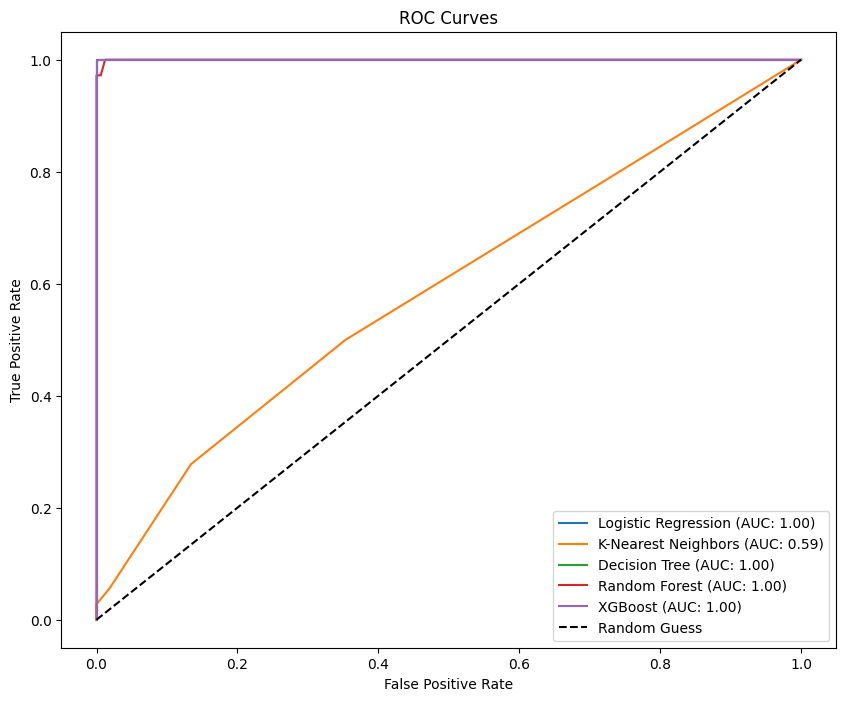

,Model,ROC-AUC
0,Logistic Regression,1.000000
1,K-Nearest Neighbors,0.590024
2,Decision Tree,1.000000
3,Random Forest,1.000000
4,XGBoost,1.000000


In [10]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluar ROC-AUC para cada modelo
roc_auc_results = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    auc_score = roc_auc_score(y_test, y_proba)  # Calcular ROC-AUC
    roc_auc_results.append({'Model': name, 'ROC-AUC': auc_score})

# Crear DataFrame con resultados
roc_auc_df = pd.DataFrame(roc_auc_results)

# Visualización de curvas ROC para cada modelo
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC: {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Mostrar resultados de ROC-AUC
roc_auc_df


Observaciones:
Sobreajuste en Logistic Regression, Decision Tree, Random Forest, y XGBoost:

El AUC perfecto sugiere que estos modelos están memorizando patrones en lugar de generalizar, lo que puede ser un problema dependiendo del tamaño del conjunto de datos.
KNN muestra un AUC de 0.590:

Esto indica que no está capturando bien la relación entre las características y la variable objetivo.
Próximos pasos:
Optimización de Hiperparámetros:

Ajustar hiperparámetros para mitigar el posible sobreajuste, especialmente en Random Forest y XGBoost.
Evaluación adicional:

Revisar las matrices de confusión para los modelos optimizados.
Generar análisis detallados con F1-Score y otras métricas.